In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load campaign data
campaign_data = pd.read_csv("google-step-up-challenge/Historic Campaign Data - Sheet1.csv")
# Inspect campaign dataset
campaign_data.info()
campaign_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Week_Start     1664 non-null   object
 1   Week_Date      1664 non-null   object
 2   Campaign_Name  1664 non-null   object
 3   Market         1664 non-null   object
 4   Channel        1664 non-null   object
 5   Spend_USD      1664 non-null   int64 
 6   Impressions    1664 non-null   int64 
 7   Reach          1664 non-null   int64 
 8   Conversions    1664 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 117.1+ KB


(1664, 9)

In [3]:
# Print 10 rows of campaign_data
campaign_data.head(10)

,Week_Start,Week_Date,Campaign_Name,Market,Channel,Spend_USD,Impressions,Reach,Conversions
0,2023-01-02,2023-01-02,Always_On,UK,YouTube,6212,331780,111134,214
1,2023-01-02,2023-01-02,Always_On,UK,Social,4262,318639,154596,137
2,2023-01-02,2023-01-02,Always_On,UK,Display,2009,515503,101883,18
3,2023-01-02,2023-01-02,Always_On,UK,Search,5513,67707,61330,466
4,2023-01-02,2023-01-02,Always_On,DE,YouTube,5664,426034,190810,173
5,2023-01-02,2023-01-02,Always_On,DE,Social,7944,480628,224773,282
6,2023-01-02,2023-01-02,Always_On,DE,Display,2804,818015,203508,25
7,2023-01-02,2023-01-02,Always_On,DE,Search,3345,48268,40600,305
8,2023-01-02,2023-01-02,Always_On,SA,YouTube,4915,313629,105299,650
9,2023-01-02,2023-01-02,Always_On,SA,Social,3534,253551,114033,448


In [4]:
# Isolate categorical column names, excluding time-series identifiers
cat_cols = (campaign_data.select_dtypes("object")
                         .drop(columns=["Week_Start", "Week_Date"])
                         .columns.to_list()
           )
# Generate a dict of unique entries for categorical columns.
unique_map =  {col: campaign_data[col].unique()
               .tolist() for col in cat_cols} 

# Print summary of unique values
for k, v in unique_map.items():
    print(f"{k}:, {v}")

Campaign_Name:, ['Always_On', 'ExamPrep_23', 'BackToSchool_23', 'NewYear_24', 'BackToSchool_24']
Market:, ['UK', 'DE', 'SA', 'EG']
Channel:, ['YouTube', 'Social', 'Display', 'Search']


In [5]:
campaign_data.loc[campaign_data["Conversions"] == campaign_data["Conversions"].max(), 
                    ["Market", "Conversions", "Impressions", "Reach", "Spend_USD"]]

,Market,Conversions,Impressions,Reach,Spend_USD
607,EG,5806,193561,168996,17676


In [6]:
campaign_data["Conversions"].max()

5806

In [7]:
campaign_data.iloc[607, 5]

17676

In [8]:
assert campaign_data.iloc[607, 5] == campaign_data["Spend_USD"].max(), f"Highest spend was {campaign_data["Spend_USD"].max()}, not {campaign_data.iloc[607, 5]} "
    
    

AssertionError: Highest spend was 28580, not 17676 

In [27]:
campaign_data.loc[campaign_data["Spend_USD"] == 28580, ["Reach"]]

,Reach
273,697889


In [28]:
campaign_data.loc[campaign_data["Spend_USD"] == 17676 , ["Reach"]]


,Reach
607,168996


In [29]:
168996 > 697889

False

In [30]:
28580 - 17676 


10904

In [31]:
campaign_data.loc[campaign_data["Spend_USD"] == 28580 , ["Market", "Conversions", "Impressions", "Reach", "Spend_USD"]]


,Market,Conversions,Impressions,Reach,Spend_USD
273,UK,929,1819432,697889,28580


In [32]:
campaign_data["cost_per_reach"] = campaign_data["Spend_USD"]/campaign_data["Reach"]
campaign_data["cost_per_conversion"] = campaign_data["Spend_USD"]/campaign_data["Conversions"]
campaign_data["cost_per_impression"] = campaign_data["Spend_USD"]/campaign_data["Impressions"]


In [33]:
campaign_data.head(10)

,Week_Start,Week_Date,Campaign_Name,Market,Channel,Spend_USD,Impressions,Reach,Conversions,cost_per_reach,cost_per_conversion,cost_per_impression
0,2023-01-02,2023-01-02,Always_On,UK,YouTube,6212,331780,111134,214,0.055896,29.028037,0.018723
1,2023-01-02,2023-01-02,Always_On,UK,Social,4262,318639,154596,137,0.027569,31.109489,0.013376
2,2023-01-02,2023-01-02,Always_On,UK,Display,2009,515503,101883,18,0.019719,111.611111,0.003897
3,2023-01-02,2023-01-02,Always_On,UK,Search,5513,67707,61330,466,0.089891,11.830472,0.081424
4,2023-01-02,2023-01-02,Always_On,DE,YouTube,5664,426034,190810,173,0.029684,32.739884,0.013295
5,2023-01-02,2023-01-02,Always_On,DE,Social,7944,480628,224773,282,0.035342,28.170213,0.016528
6,2023-01-02,2023-01-02,Always_On,DE,Display,2804,818015,203508,25,0.013778,112.160000,0.003428
7,2023-01-02,2023-01-02,Always_On,DE,Search,3345,48268,40600,305,0.082389,10.967213,0.069301
8,2023-01-02,2023-01-02,Always_On,SA,YouTube,4915,313629,105299,650,0.046677,7.561538,0.015671
9,2023-01-02,2023-01-02,Always_On,SA,Social,3534,253551,114033,448,0.030991,7.888393,0.013938


<Axes: xlabel='Market'>

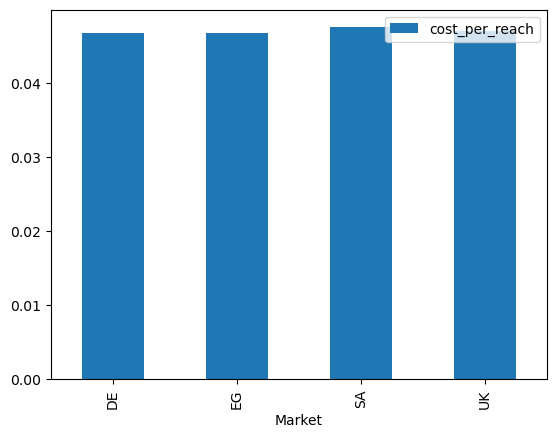

In [34]:
cpr_market_wise = pd.pivot_table(campaign_data, "cost_per_reach", "Market", aggfunc="mean")
cpr_market_wise.plot(kind="bar")

<Axes: xlabel='Channel'>

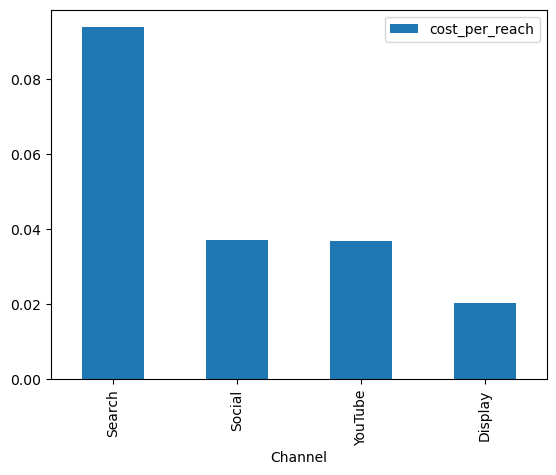

In [35]:
cpr_channel_wise = pd.pivot_table(campaign_data, "cost_per_reach", "Channel", aggfunc="mean")
cpr_channel_wise = cpr_channel_wise.sort_values(by="cost_per_reach", ascending=False)
cpr_channel_wise.plot(kind="bar")

<Axes: xlabel='Campaign_Name'>

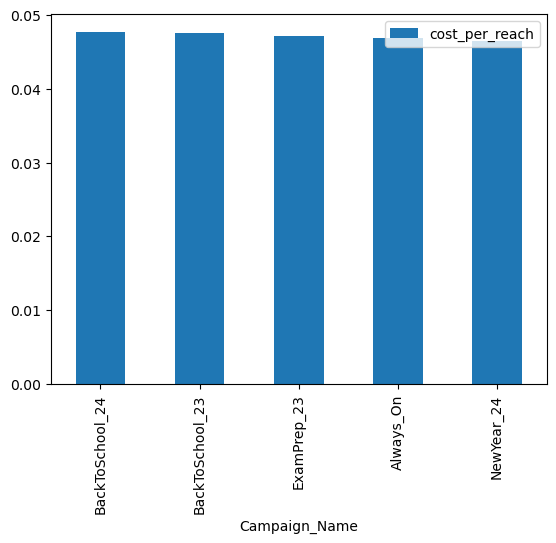

In [36]:
cpr_campaign_wise = pd.pivot_table(campaign_data, "cost_per_reach", "Campaign_Name", aggfunc="mean")
cpr_campaign_wise = cpr_campaign_wise.sort_values(by="cost_per_reach", ascending=False)
cpr_campaign_wise.plot(kind="bar")

<Axes: xlabel='Channel'>

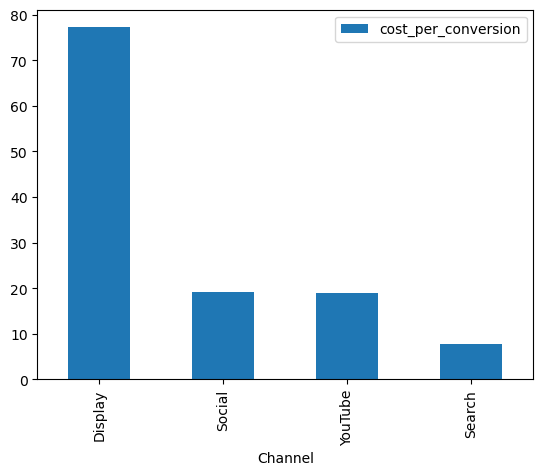

In [37]:
cpc_channel_wise = pd.pivot_table(campaign_data, "cost_per_conversion", "Channel", aggfunc="mean")
cpc_channel_wise = cpc_channel_wise.sort_values(by="cost_per_conversion", ascending=False)
cpc_channel_wise.plot(kind="bar")

<Axes: xlabel='Campaign_Name'>

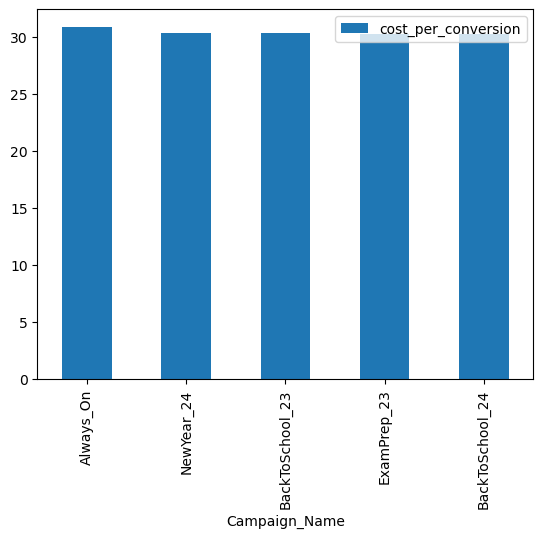

In [38]:
cpc_campaign_wise = pd.pivot_table(campaign_data, "cost_per_conversion", "Campaign_Name", aggfunc="mean")
cpc_campaign_wise = cpc_campaign_wise.sort_values(by="cost_per_conversion", ascending=False)
cpc_campaign_wise.plot(kind="bar")

<Axes: xlabel='Market'>

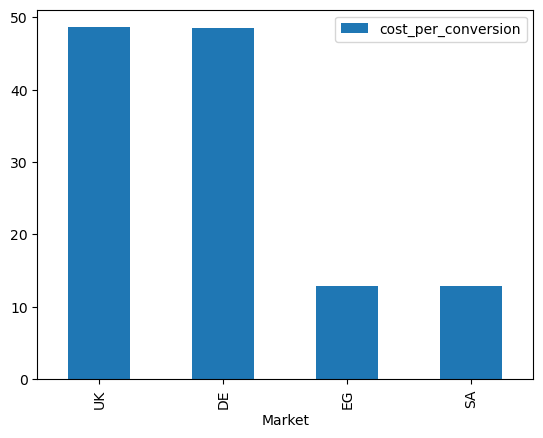

In [39]:
cpc_market_wise = pd.pivot_table(campaign_data, "cost_per_conversion", "Market", aggfunc="mean")
cpc_market_wise = cpc_market_wise.sort_values(by="cost_per_conversion", ascending=False)
cpc_market_wise.plot(kind="bar")

<Axes: xlabel='Campaign_Name'>

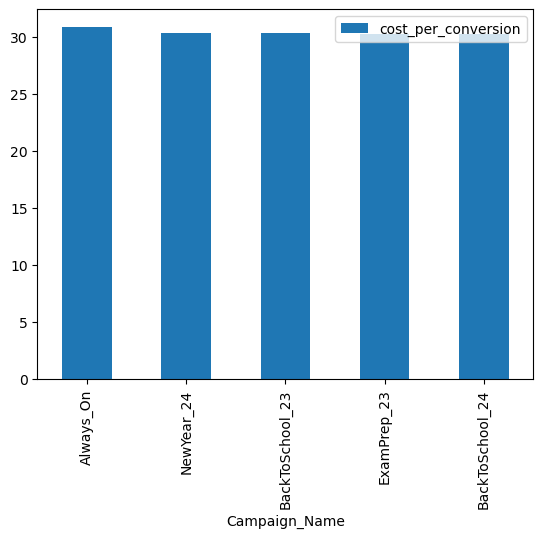

In [40]:
cpc_campaign_wise = cpc_campaign_wise.sort_values(by="cost_per_conversion", ascending=False)
cpc_campaign_wise.plot(kind="bar")

<Axes: xlabel='Market'>

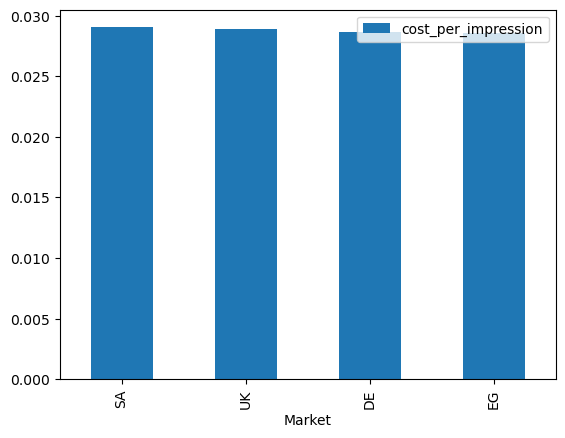

In [41]:
cpi_market_wise = pd.pivot_table(campaign_data, "cost_per_impression", "Market", aggfunc="mean")
cpi_market_wise = cpi_market_wise.sort_values(by="cost_per_impression", ascending=False)
cpi_market_wise.plot(kind="bar")

<Axes: xlabel='Market'>

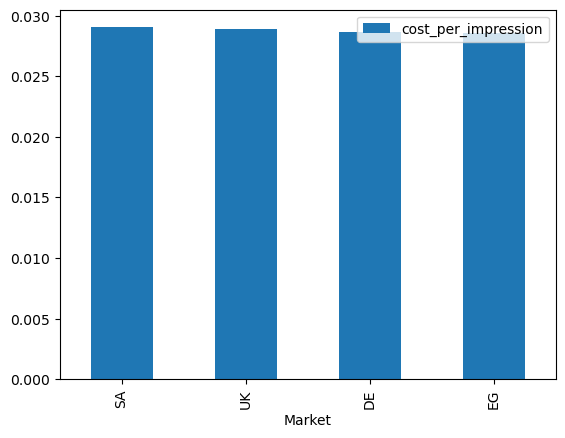

In [42]:
cpi_campaign_wise = pd.pivot_table(campaign_data, "cost_per_impression", "Campaign_Name", aggfunc="mean")
cpi_campaign_wise = cpi_campaigncpi_campaign_wise = pd.pivot_table(campaign_data, "cost_per_impression", "Campaign_Name", aggfunc="mean")
cpi_campaign_wise = cpi_market_wise.sort_values(by="cost_per_impression", ascending=False)
cpi_campaign_wise.plot(kind="bar")


<Axes: xlabel='Channel'>

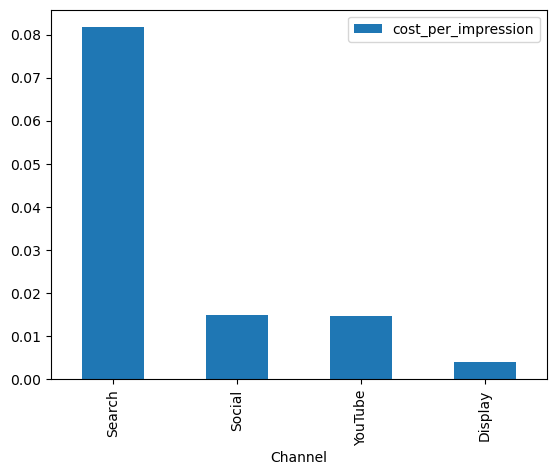

In [43]:
cpi_channel_wise = pd.pivot_table(campaign_data, "cost_per_impression", "Channel", aggfunc="mean")
cpi_channel_wise = cpi_channel_wise.sort_values(by="cost_per_impression", ascending=False)
cpi_channel_wise.plot(kind="bar")

In [44]:
cost_of_impression for search is expensive comapred to these other channels. Could these be cause for search, the advert popped up ony when an individual searched something that was somehow related to the ad?

Object `ad` not found.


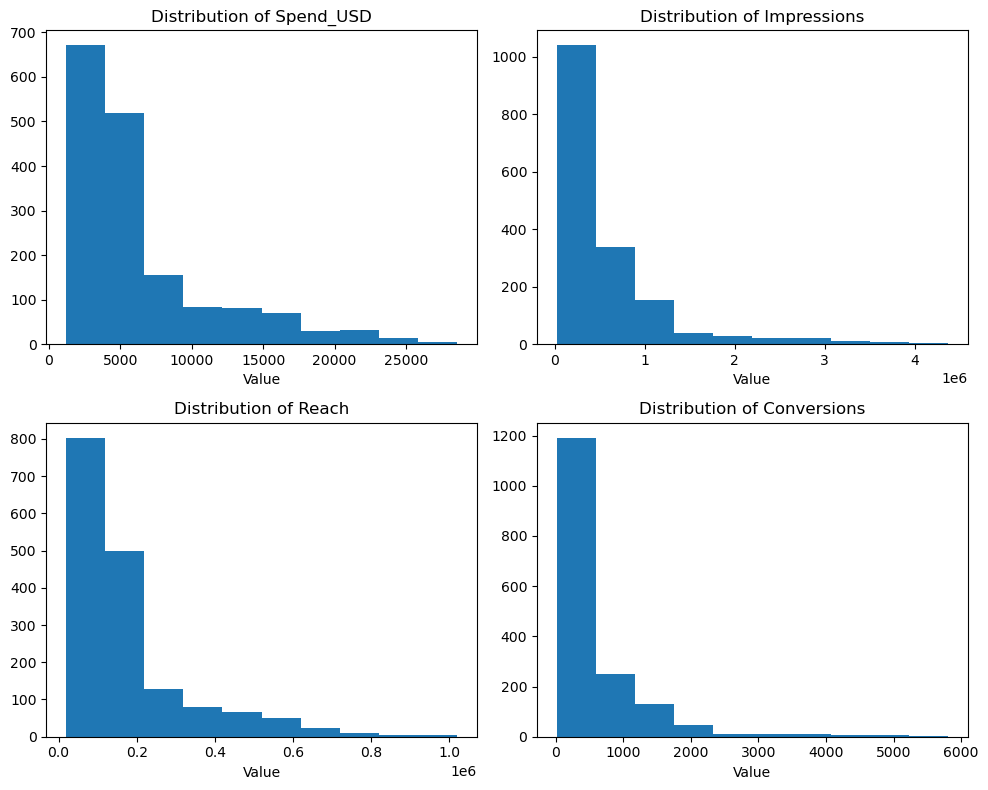

In [45]:
# Plot histograms to check whether there is any irregular distribution across the different numeric features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

num_features = (campaign_data.select_dtypes("number")
                             .drop(columns=["cost_per_conversion", "cost_per_impression", "cost_per_reach"])
                             .columns.to_list())
axes = axes.flatten()
# Select the current axis
for i, col in enumerate(num_features):
    # Select the current axis
    ax = axes[i]
    
    # Plot your data on that specific axis
    ax.hist(campaign_data[col], bins=10)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel("Value")

# 5. Clean up layout so labels don't overlap
plt.tight_layout()
plt.show()

In [46]:
type(num_features)

list

In [47]:
for col in num_features:
    print(campaign_data[col].describe())

count     1664.000000
mean      6380.615986
std       5054.519868
min       1203.000000
25%       3131.750000
50%       4479.000000
75%       7253.750000
max      28580.000000
Name: Spend_USD, dtype: float64
count    1.664000e+03
mean     5.397789e+05
std      6.248649e+05
min      2.068100e+04
25%      1.679835e+05
50%      3.410285e+05
75%      6.603520e+05
max      4.369702e+06
Name: Impressions, dtype: float64
count    1.664000e+03
mean     1.738074e+05
std      1.570130e+05
min      1.871300e+04
25%      7.515575e+04
50%      1.224985e+05
75%      1.994250e+05
max      1.020650e+06
Name: Reach, dtype: float64
count    1664.000000
mean      571.172476
std       746.391781
min        13.000000
25%       128.750000
50%       335.500000
75%       656.250000
max      5806.000000
Name: Conversions, dtype: float64


In [48]:
# Balanced Reach/Impression/Conversion data
bottom, top = campaign_data["Impressions"].quantile([0.1, 0.9])
unskewed_map = campaign_data[campaign_data["Impressions"].between(bottom, top)]

# Drop efficiencies determined with skewed data
campaign_data.drop(columns=["cost_per_reach", "cost_per_conversion", "cost_per_impression"],
                                       inplace=True)
# Instantiate an unskewing function
def unskew(col_name):
    
    # Determine the 10th and 90th quantile
    bottom, top = campaign_data[col_name].quantile([0.1, 0.9])
    # Subset campaign_data df with above quantiles as bounds
    unskewed_data = campaign_data[campaign_data[col_name].between(bottom, top)]

    return unskewed_data


In [49]:
campaign_data.head()

,Week_Start,Week_Date,Campaign_Name,Market,Channel,Spend_USD,Impressions,Reach,Conversions
0,2023-01-02,2023-01-02,Always_On,UK,YouTube,6212,331780,111134,214
1,2023-01-02,2023-01-02,Always_On,UK,Social,4262,318639,154596,137
2,2023-01-02,2023-01-02,Always_On,UK,Display,2009,515503,101883,18
3,2023-01-02,2023-01-02,Always_On,UK,Search,5513,67707,61330,466
4,2023-01-02,2023-01-02,Always_On,DE,YouTube,5664,426034,190810,173


In [50]:
unskewed_reach = unskew("Reach").copy()
unskewed_impressions = unskew("Impressions").copy()
unskewed_conversions = unskew("Conversions").copy()

In [51]:
# Calculate efficiencies across reach/impression/conversion (unskewed data)
def efficiencies(df, df_var_name):
    df[f"cp_{df_var_name}"] = df["Spend_USD"]/df["Reach"]
    
    return df


In [52]:
efficiencies(unskewed_reach, "reach")

,Week_Start,Week_Date,Campaign_Name,Market,Channel,Spend_USD,Impressions,Reach,Conversions,cp_reach
0,2023-01-02,2023-01-02,Always_On,UK,YouTube,6212,331780,111134,214,0.055896
1,2023-01-02,2023-01-02,Always_On,UK,Social,4262,318639,154596,137,0.027569
2,2023-01-02,2023-01-02,Always_On,UK,Display,2009,515503,101883,18,0.019719
3,2023-01-02,2023-01-02,Always_On,UK,Search,5513,67707,61330,466,0.089891
4,2023-01-02,2023-01-02,Always_On,DE,YouTube,5664,426034,190810,173,0.029684
...,...,...,...,...,...,...,...,...,...,...
1657,2024-12-23,2024-12-23,Always_On,SA,Social,3405,265478,128016,472,0.026598
1658,2024-12-23,2024-12-23,Always_On,SA,Display,2658,700349,168825,83,0.015744
1660,2024-12-23,2024-12-23,Always_On,EG,YouTube,4473,260219,106800,554,0.041882
1661,2024-12-23,2024-12-23,Always_On,EG,Social,2129,112521,47827,287,0.044515


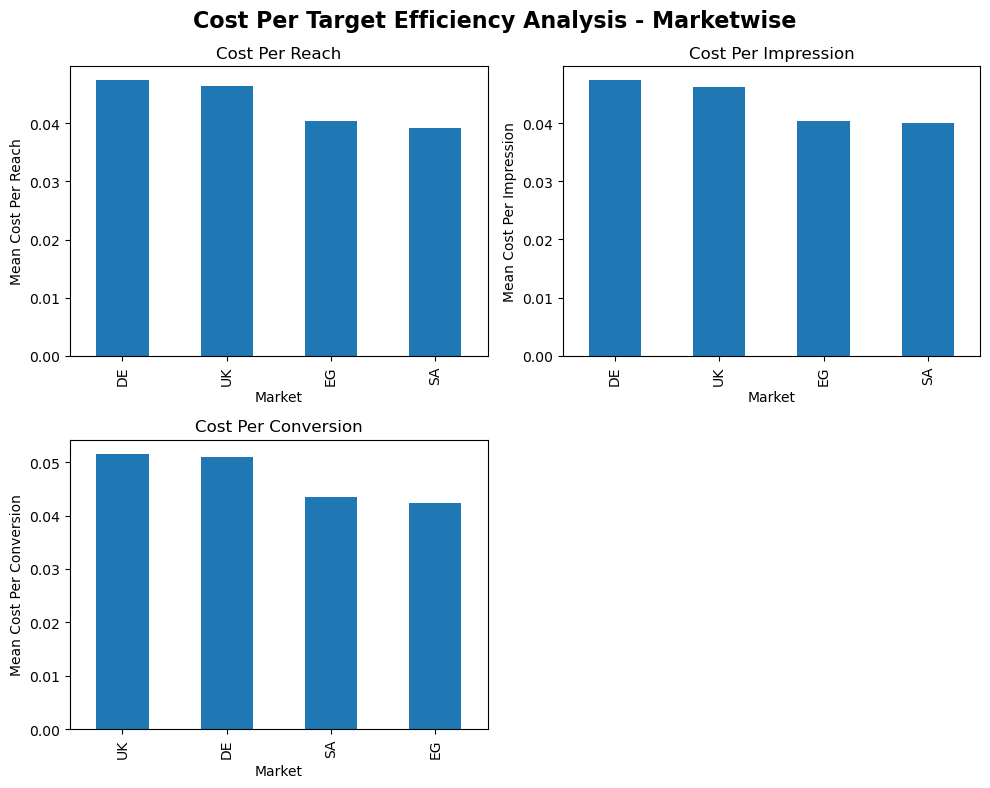

In [124]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax_top_left = axes[0, 0]
c_per_r_marketwise = pd.pivot_table(efficiencies(unskewed_reach, "reach"), "cp_reach", 
                                    "Market", aggfunc="mean").sort_values(by="cp_reach", ascending=False)
c_per_r_marketwise.plot(kind="bar", ax=ax_top_left)

ax_top_left.set(
    title="Cost Per Reach",
    xlabel="Market",
    ylabel="Mean Cost Per Reach"
)


ax_top_right = axes[0, 1]
c_per_i_marketwise = pd.pivot_table(efficiencies(unskewed_impressions, "impression"), "cp_impression", 
                                    "Market", aggfunc="mean").sort_values(by="cp_impression", ascending=False)
c_per_i_marketwise.plot(kind="bar", ax=ax_top_right)

ax_top_right.set(
    title="Cost Per Impression",
    xlabel="Market",
    ylabel="Mean Cost Per Impression"
)


ax_bottom_right = axes[1, 0]
c_per_c_marketwise = pd.pivot_table(efficiencies(unskewed_conversions, "conversion"), "cp_conversion", 
                                    "Market", aggfunc="mean").sort_values(by="cp_conversion", ascending=False)
c_per_c_marketwise.plot(kind="bar", ax=ax_bottom_right)


ax_bottom_right.set(
    title="Cost Per Conversion",
    xlabel="Market",
    ylabel="Mean Cost Per Conversion"
)


# Remove legend from all subplots
for ax in axes.flatten():
    if ax.get_legend():
        ax.get_legend().remove()


# Remove unused axis
axes[1, 1].remove()
fig.suptitle("Cost Per Target Efficiency Analysis - Marketwise", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show();

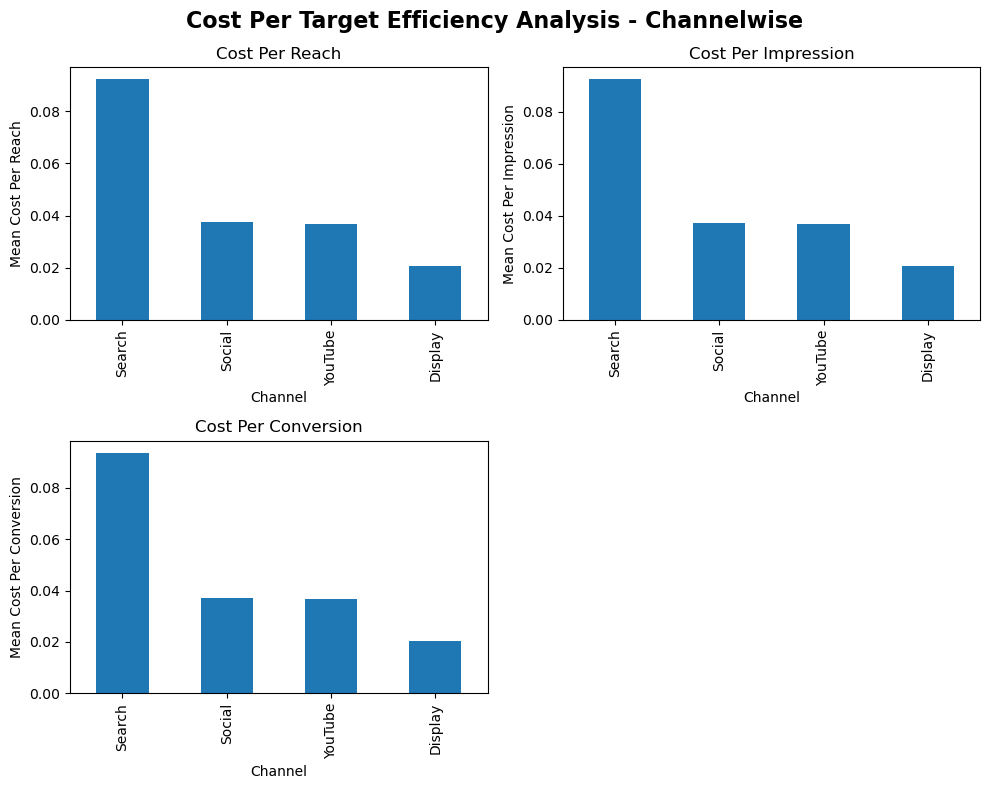

In [122]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax_top_left = axes[0, 0]
c_per_r_channelwise = pd.pivot_table(efficiencies(unskewed_reach, "reach"), "cp_reach", 
                                     "Channel", aggfunc="mean").sort_values(by="cp_reach", ascending=False)
c_per_r_channelwise.plot(kind="bar", ax=ax_top_left)

ax_top_left.set(
    title="Cost Per Reach",
    xlabel="Channel",
    ylabel="Mean Cost Per Reach"
)

ax_top_right = axes[0, 1]
c_per_i_channelwise = pd.pivot_table(efficiencies(unskewed_impressions, "impression"), "cp_impression",
                                     "Channel", aggfunc="mean").sort_values(by="cp_impression", ascending=False)

c_per_i_channelwise.plot(kind="bar", ax=ax_top_right)

ax_top_right.set(  
    title="Cost Per Impression",
    xlabel="Channel",
    ylabel="Mean Cost Per Impression"
)

ax_bottom_left = axes[1, 0]
c_per_c_channelwise = pd.pivot_table(efficiencies(unskewed_conversions, "conversion"), 
                                     "cp_conversion", "Channel", aggfunc="mean").sort_values(by="cp_conversion", ascending=False)
c_per_c_channelwise.plot(kind="bar", ax=ax_bottom_left)

ax_bottom_left.set( 
    title="Cost Per Conversion",
    xlabel="Channel",
    ylabel="Mean Cost Per Conversion"
)

# Remove legend from all subplots
for ax in axes.flatten():
    if ax.get_legend():
        ax.get_legend().remove()
        
# Remove unused axis
axes[1, 1].remove()
fig.suptitle("Cost Per Target Efficiency Analysis - Channelwise", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show();

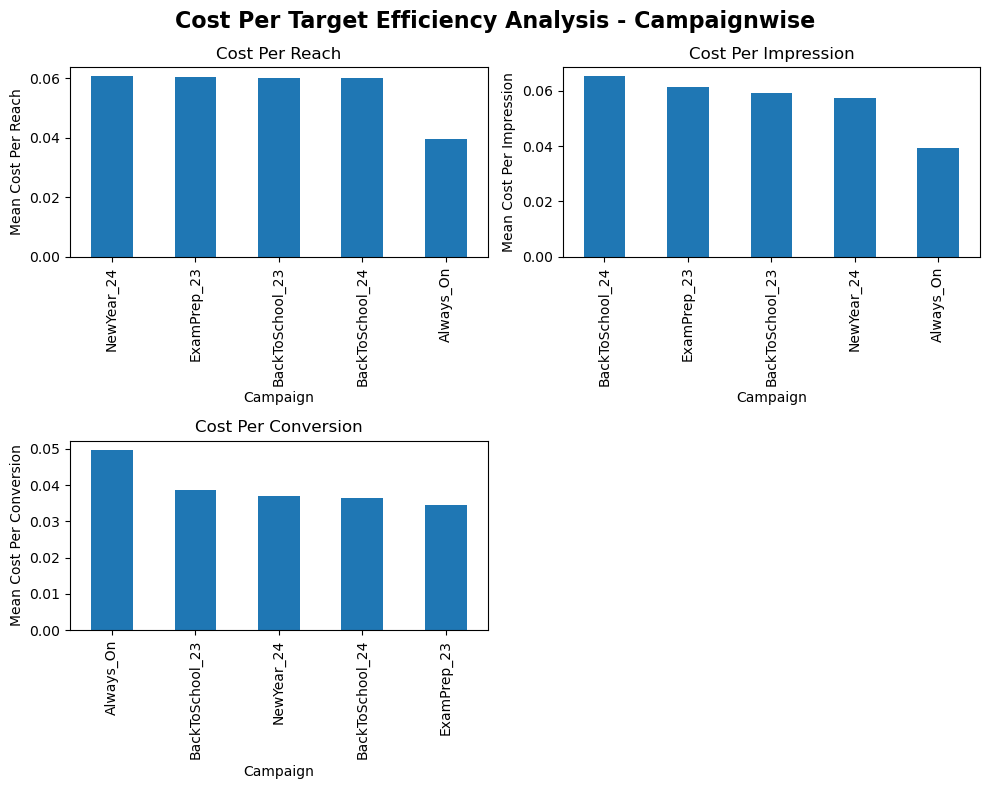

In [126]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax_r = axes[0, 0]
c_per_r_campaignwise = pd.pivot_table(efficiencies(unskewed_reach, "reach"), "cp_reach", 
                                      "Campaign_Name", aggfunc="mean").sort_values(by="cp_reach", ascending=False)
c_per_r_campaignwise.plot(kind="bar", ax=ax_r)

ax_r.set( 
    title="Cost Per Reach",
    xlabel="Campaign",
    ylabel="Mean Cost Per Reach"
)

ax_i = axes[0, 1]
c_per_i_campaignwise = pd.pivot_table(efficiencies(unskewed_impressions, "impression"), "cp_impression",
                                      "Campaign_Name", aggfunc="mean").sort_values(by="cp_impression", ascending=False)
c_per_i_campaignwise.plot(kind="bar", ax=ax_i)

ax_i.set( 
    title="Cost Per Impression",
    xlabel="Campaign",
    ylabel="Mean Cost Per Impression"
)


ax_c = axes[1, 0]
c_per_c_campaignwise = pd.pivot_table(efficiencies(unskewed_conversions, "conversion"), "cp_conversion", 
                                      "Campaign_Name", aggfunc="mean").sort_values(by="cp_conversion", ascending=False)
c_per_c_campaignwise.plot(kind="bar", ax=ax_c)

ax_c.set( 
    title="Cost Per Conversion",
    xlabel="Campaign",
    ylabel="Mean Cost Per Conversion"
)


# Remove legend from all subplots
for ax in axes.flatten():
    if ax.get_legend():
        ax.get_legend().remove()
        
# Remove unused axis
axes[1, 1].remove()
fig.suptitle("Cost Per Target Efficiency Analysis - Campaignwise", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show();